In [228]:
#Import library yang dibutuhkan untuk proses klasifikasi
import pandas as pd
import numpy as np
import string #library untuk bekerja dengan text
import re #import modul regular expression # regex untuk membersihkan kata kata tweet

In [229]:
#Import data CSV hasil dari proses pre-processing dan penghapusan data ganda yang ingin diproses dalam tahapan klasifikasi
# header_list = ["text","label"]
# ddata_label = pd.read_csv('D:/data2023/databersih.csv', names=header_list)
# data_label

header_list = ["text","label"]
data_label = pd.read_csv('D:/data2023/databersih.csv', names=header_list)
data_label

,text,label
0,biaya langka minyak goreng masyarakat indonesi...,0
1,minyak goreng curah subsidi perintah belum ada...,0
2,tidak perlu larang ekspor cpo daya bulog toko ...,1
3,minyak goreng tidak ada pasar ciampea bogor,1
4,anggota komisi vii dpr ri mulyanto perintah ja...,0
...,...,...
995,biaya langka minyak goreng timbul rugi ekonomi...,1
996,minyak goreng biaya sawit turun,1
997,warga barang beli warteg minyak goreng,0
998,perintah negara kembang produk red palm oil rp...,0


In [230]:
label_count = data_label['label'].value_counts()
label_count

0    589
1    411
Name: label, dtype: int64

<AxesSubplot:>

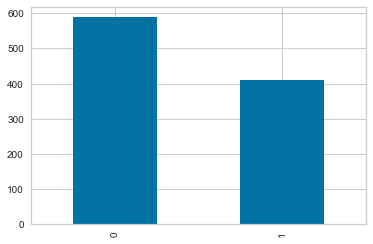

In [231]:
# Import Matplotlib Dan Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data_label.label.value_counts().plot(kind='bar')


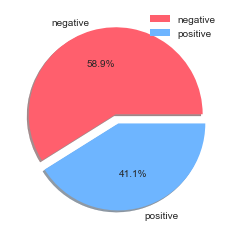

In [232]:
#Data to plot
# labels = ['negative','positive']
# colors = ("#FF968A","#6EB5FF")

labels = ['negative','positive']
colors = ("#FF5F6D","#6EB5FF")

explode = (0.01,0.1) #explode 1st slice

#plot
fig,ax = plt.subplots()
ax.pie(data_label.label.value_counts(), labels=labels, autopct='%.1f%%', explode=explode, shadow=True, colors=colors)
ax.legend(labels,loc='best')
ax.set_aspect('equal')
plt.tight_layout
plt.show()

#plt.savefig('pie.png')

In [233]:
df = data_label[data_label['label']== 0]
df.head()

,text,label
0,biaya langka minyak goreng masyarakat indonesi...,0
1,minyak goreng curah subsidi perintah belum ada...,0
4,anggota komisi vii dpr ri mulyanto perintah ja...,0
6,aneh pas biaya liter nyarinya susah gilir biay...,0
7,asli minyak goreng mahal nyarinya susah tanpa ...,0


In [234]:
df = data_label[data_label['label']== 1]
df.head()

,text,label
2,tidak perlu larang ekspor cpo daya bulog toko ...,1
3,minyak goreng tidak ada pasar ciampea bogor,1
5,minyak goreng belum lihat taban,1
14,biaya minyak goreng turun,1
15,belum lagi daerah daerah pencil butuh minyak g...,1


In [235]:
#Import library untuk melakukan proses klasifikasi, validasi maupun evaluasi
from time import time #untuk proses perhitungan waktu komputasi
from sklearn.model_selection import GridSearchCV #untuk proses penyetelan parameter
from sklearn.pipeline import Pipeline #untuk menampung beberapa tahapan untuk proses klasifikasi yang dimana pembelajaran 
#mesin dapat berjalan otomatis secara bersama berurutan bergantian tetapi dalam tahap berbeda.
from sklearn.feature_extraction.text import TfidfVectorizer #untuk proses pembobotan kata dengan pemberian bobot nilai kepada 
#sebuah kata dengan melihat frekuensi relatif kemunculan kata dalam dokumen teks
from sklearn.naive_bayes import BernoulliNB #untuk proses klasifikasi dalam algorirma Naive Bayes varian Bernoulli Naive Bayes
from sklearn.svm import SVC #untuk proses klasifikasi dalam algoritma SVM
from sklearn.neighbors import KNeighborsClassifier #untuk proses klasifikasi dalam algoritma K-NN
from sklearn.model_selection import train_test_split #untuk proses pembagian data training maupun testing
from sklearn.model_selection import KFold #Untuk proses KFoldValidation
from sklearn.model_selection import cross_val_score #untuk proses validasi dengan nilai perulangan sesuai nilai K
from sklearn import metrics 
from sklearn.metrics import classification_report #untuk proses menampilkan evaluasi
from sklearn.metrics import accuracy_score #untuk proses menampilkan hasil akurasi dari proses model klasifikasi
from sklearn.metrics import precision_recall_curve #untuk proses menampilkan hasil presisi dan recall dari proses model klasifikasi
from sklearn.metrics import f1_score #untuk proses menampilkan hasil f1-score dari proses model klasifikasi
from sklearn.metrics import roc_curve, auc #untuk proses menampilkan hasil Area Hitung di Bawah Kurva Karakteristik Operasi 
#Penerima (AUC ROC) dari skor prediksi.

In [236]:
#Proses untuk pembagian dataset training dan testing

#Membangun One-dimensional array dan N-dimensional array dengan nilai random. 
#Gunakan fungsi np.random.randint(batas atas, size=dimensi array)

#np.random.randint(low, high=None, size=None, dtype=int)
#Fungsi untuk melakukan pengambilan sampel secara acak di numpy
#Membuat variabel index yang berguna untuk menghilangkan index pada data
idx = np.random.randint(0,1000,1000)

#.loc = membaca baris berdasarkan index
reduce_data = data_label.loc[idx] 
"""
Membaca setiap baris data yang ada di dataframe data label berdasarkan hasil pengacakan pada variabel idx yang sudah melakukan 
pengambilan sampel secara acak, kemudian dari proses tersebut disimpan lagi di dalam dataframe reduce_data
"""
data_train,data_test=train_test_split(reduce_data,test_size = 0.2) 
"""
Membagi data dengan menggunakan fungsi train_test_split yang dimana parameter masukan berisi dataframe
reduce_data=data yang sudah dibaca perbarisnya, serta ukuran pembagian datanya, disini 0.2 artinya 
pembagian data menghasilkan data testing sebanyak 30% dan sisanya data training. Data tersebut akan 
disimpan ke dalam variabel data_train dan data_test yang dimana 
"""
#Menetapkan isi dari variabel train dan test yang termasuk isi dari data training dan testing dalam bentuk list
train = data_train[['text','label']].reset_index().drop('index',axis=1)
test = data_test[['text','label']].reset_index().drop('index',axis=1)
#Menggunakan fungsi drop () untuk mengambil semua data lainnya di index. Kemudian, dibagi datanya.

In [237]:
#Proses import data split yang sudah dipisahkan sebelumnya untuk diolah pada proses model klasifikasi
header_list = ["text","label"]
train.to_csv('D:/data2023/traincoba1.csv', header=None, index=False)
test.to_csv('D:/data2023/testcoba1.csv', header=None, index=False)


In [238]:
header_list = ["text","label"]
train = pd.read_csv('D:/data2023/traincoba1.csv',names=header_list)
test = pd.read_csv('D:/data2023/testcoba1.csv', names=header_list)

In [239]:
"""
Proses mendefinisikan atau seleksi kolom yang menjadi prediktor maupun output ke dalam variabel X dan y dalam set pelatihan
maupun pengujian yang dimana dari kedua variabel tersebut memiliki peran sebagai variabel independen dan dependen untuk proses
klasifikasi

Set pelatihan adalah bagian dari kumpulan data yang digunakan untuk melatih model. 
=>X_train adalah kumpulan data pelatihan. Variabel ini termasuk kedalam variabel independen.
=>y_train adalah kumpulan label untuk semua data di X_train. Termasuk variabel dependen yang perlu diprediksi oleh model, 
seperti termasuk label kategori terhadap variabel independen yang ada, oleh karna itu perlu menentukan variabel dependen 
saat melatih / menyesuaikan model.

Set pengujian adalah subset dari kumpulan data yang Anda gunakan untuk menguji model Anda setelah model melalui pemeriksaan
awal oleh set validasi.
=>X_test adalah kumpulan data pengujian. Variabel ini termasuk kedalam variabel independen. 
Variabel independen dari data yang tidak akan digunakan dalam tahap pelatihan dan akan digunakan untuk membuat prediksi 
guna menguji keakuratan model
=>y_test adalah kumpulan label untuk semua data di X_test. Label ini akan digunakan untuk menguji akurasi antara kategori 
aktual dan prediksi

"""
X_train = train.text #data file train dengan kolom text
y_train = train.label #data file train dengan kolom label
X_test = test.text #data file test dengan kolom text
y_test = test.label #data file text dengan kolom label

In [240]:
"""
Tentukan pipeline yang berisi metode mana yang digunakan yang nantinya akan diproses untuk menjadi model terbaik dengan
menggabungkan ekstraktor fitur teks dengan pengklasifikasi sederhana.

Disini pipeline berisi estimator dari beberapa metode algoritma yang digunakan untuk menampung semua fitur ekstraksi maupun 
fitur dari metode algoritma yang akan di ujikan satu sama lain pada proses penyetelan dengan pendekatan GridSearchCV.
"""
text_clf_bnb = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', BernoulliNB())])

"""
Proses penyetelan menggunakan hyperparameter utama pada setiap metode algoritma. Banyak parameter yang dicoba akan memberikan
daya penjelajahan yang lebih baik tetapi akan meningkatkan waktu pemrosesan dengan cara kombinatorial.

Pada metode algoritma Naive Bayes varian BernoulliNB ini menggunakan pencarian nilai terbaik dari hyperparameter binarize
dan alpha, kemudian untuk ekstraksi fitur kata menggunakan dari TFIDFVectorizer dengan pemilihan nilai hyperparameter
ngram_range
"""

"""
Pipeline ini dilakukan dengan cara memungkinkan pengaturan parameter dari berbagai langkah menggunakan nama mereka dan nama 
parameter yang dipisahkan dengan penulisan __ seperti pada contoh di bawah ini. Estimator langkah dapat diganti seluruhnya 
dengan mengatur parameter dengan namanya ke estimator lain.
"""

tuned_parameters_bnb = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
#    'clf__binarize' : [0.0,0,5,0.6,1.0,1.5],
    'clf__alpha': [1, 1e-1, 1e-2, 1e-3, 1e-4]
}

# Tahapan pengujian setiap nilai parameter untuk mencari mana yang terbaik, prosesnya terjadi di dalam Grid


In [241]:
t = time()

"""
Tahapan proses mencari nilai dari hyperparameter setiap algoritma menggunakan GridSearchCV untuk mendapatkan kombinasi parameter
terbaik dengan gabungan fitur lainnya selain pengklasifikasian
"""

#Melakukan validasi sebanyak 10 kali untuk masing-masing nilai pada parameter alpha
cv = KFold(n_splits=10, shuffle=True, random_state=1)

#Membuat objek clf_bnb sebagai fungsi dari proses GridsearchCV
clf_bnb = GridSearchCV(text_clf_bnb, tuned_parameters_bnb, scoring = 'accuracy', cv=cv, n_jobs = -1,return_train_score=True)

#Sesuaikan dengan model/Masukkan ke model/Fit the model
#Fitting model dimana model belajar untuk mencari hubungan antara X_train dan y_train 
clf_bnb.fit(X_train,y_train)

print("Hasil Score data test : ", clf_bnb.score(X_train,y_train))
print("Hasil Score data test : ", clf_bnb.score(X_test,y_test))

training_time = time() - t
print("Waktu Komputasi dari proses hyperparameter tuning di dalam Grid: %0.3fs" % training_time)

Hasil Score data test :  0.8275
Hasil Score data test :  0.76
Waktu Komputasi dari proses hyperparameter tuning di dalam Grid: 1.017s


In [242]:
"""
Proses menampilkan setiap kombinasi nilai hyperparameter dari proses pengujian sebelumnya, hal ini memudahkan untuk melihat 
setiap alur dari pencocokan berlangsung yang dimana hasil akhir berupa nilai terbaik dari kombinasi antar beberapa estimator
(seperti pemilihan fitur) yang diujikan pada 1 set penyetelan dalam sistem pipeline.
"""

print("Best parameters set found on development set:")
print(clf_bnb.best_params_)
print("Best Score:", clf_bnb.best_score_)
print('\n')

means = clf_bnb.cv_results_['mean_test_score'] #nilai rata rata akurasi
stds = clf_bnb.cv_results_['std_test_score'] #nilai standar deviasi
params = clf_bnb.cv_results_['params'] #nilai-nilai param yang sudah didefinisikan ke opsi pengujian sebelumnya (text_clf_bnb,
#tuned_parameters_bnb yang dimana ditampilkan dalam bentuk berupa pencocokan secara satu-persatu

#Proses perulangan untuk menampilkan nilai-nilai tersebut
for mean, stdev, param in zip(means,stds,params):
    print("Mean: %f Stdev:(%f) with: %r" % (mean,stdev,param))

Best parameters set found on development set:
{'clf__alpha': 0.0001, 'tfidf__ngram_range': (1, 3)}
Best Score: 0.7575


Mean: 0.716250 Stdev:(0.045432) with: {'clf__alpha': 1, 'tfidf__ngram_range': (1, 1)}
Mean: 0.735000 Stdev:(0.050249) with: {'clf__alpha': 1, 'tfidf__ngram_range': (1, 2)}
Mean: 0.738750 Stdev:(0.052871) with: {'clf__alpha': 1, 'tfidf__ngram_range': (1, 3)}
Mean: 0.743750 Stdev:(0.056803) with: {'clf__alpha': 0.1, 'tfidf__ngram_range': (1, 1)}
Mean: 0.751250 Stdev:(0.054900) with: {'clf__alpha': 0.1, 'tfidf__ngram_range': (1, 2)}
Mean: 0.752500 Stdev:(0.060156) with: {'clf__alpha': 0.1, 'tfidf__ngram_range': (1, 3)}
Mean: 0.743750 Stdev:(0.052812) with: {'clf__alpha': 0.01, 'tfidf__ngram_range': (1, 1)}
Mean: 0.751250 Stdev:(0.056582) with: {'clf__alpha': 0.01, 'tfidf__ngram_range': (1, 2)}
Mean: 0.755000 Stdev:(0.058949) with: {'clf__alpha': 0.01, 'tfidf__ngram_range': (1, 3)}
Mean: 0.743750 Stdev:(0.052812) with: {'clf__alpha': 0.001, 'tfidf__ngram_range': (1, 1)}
M

In [243]:
"""
Meringkas hasil dari GrisSearchCV
Menampilkan hasil setiap pencocokan parameter dari proses GridSearchCV beserta nilai pelatihan dan pengujian dari setiap 
kombinasi dalam bentuk DataFrame yang isinya berupa pasangan kombinasi tiap hyperparameter yang diujikan.
"""
result_bnb = pd.DataFrame(clf_bnb.cv_results_['params'])
result_bnb['test_score'] = clf_bnb.cv_results_['mean_test_score']
result_bnb['train_score'] = clf_bnb.cv_results_['mean_train_score']
result_bnb

,clf__alpha,tfidf__ngram_range,test_score,train_score
0,1.0000,"(1, 1)",0.71625,0.800694
1,1.0000,"(1, 2)",0.73500,0.807778
2,1.0000,"(1, 3)",0.73875,0.816806
3,0.1000,"(1, 1)",0.74375,0.810556
4,0.1000,"(1, 2)",0.75125,0.817222
5,0.1000,"(1, 3)",0.75250,0.825278
6,0.0100,"(1, 1)",0.74375,0.810833
7,0.0100,"(1, 2)",0.75125,0.818750
8,0.0100,"(1, 3)",0.75500,0.826389
9,0.0010,"(1, 1)",0.74375,0.810833


In [244]:
import joblib
final_model = clf_bnb.best_estimator_
joblib.dump(final_model, "clf_bnb.pkl")

['clf_bnb.pkl']

--- Proses Hyperparameters Tuning Selesai ---

Proses Pemodelan BNB


> Pipeline dapat digunakan untuk menghubungkan beberapa estimator menjadi satu. Ini berguna karena sering sekali ada urutan langkah yang tetap dalam memproses data, misalnya pemilihan fitur, normalisasi, dan klasifikasi.

-> Dalam pipeline ini pemilihan parameter dapat dilakukan bersama dengan pencarian grid atas parameter semua estimator dalam satu sistem pipeline sekaligus. Sistem ini dibuat menggunakan daftar pasangan (key, value), di mana kuncinya adalah string yang berisi nama yang ingin diberikan dan nilainya adalah objek penaksir yang berisi nilai parameter di dalamnya.



In [245]:
t = time()

#Proses melatih model
#Mengaktifkan/memanggil/membuat fungsi klasifikasi Bernoulli Naive Bayes dengan pemilihan fitur yang akan digunakan
#Dalam proses ini hasil nilai setiap parameter didapat dari proses sebelumnya setelah melakukan proses pencocokan atau
#kombinasi, yaitu proses hyperparameter tuning. 
bnb = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1,2))),
                ('clf', BernoulliNB(alpha=0.1))])

"""
Sesuaikan dengan model/Masukkan ke model/Fit the model. Memasukkan data training pada fungsi klasifikasi BNB.
Masukan dalam bentuk parameter yang berisi X_train (kumpulan data pelatihan yang bersifat independen), y_train (kumpulan label 
untuk semua data di X_train yang bersifat dependen yang perlu diprediksi oleh model)

Cocokkan semua transformasi satu demi satu dan transformasikan data, kemudian set data yang ditransformasi menggunakan 
estimator akhir.
"""
# Fitting model dimana model belajar untuk mencari hubungan antara X_train dan y_train 
bnb.fit(X_train,y_train)

#Untuk set waktu selama proses training sedang berjalan
training_time = time() - t
print("train time: %0.3fs" % training_time)

print("================================")
print("Hasil Score data train : ", bnb.score(X_train,y_train))
print("Hasil Score data test : ", bnb.score(X_test,y_test))

train time: 0.007s
Hasil Score data train :  0.815
Hasil Score data test :  0.755


In [246]:
"""
Set validasi adalah subset dari kumpulan data (terpisah dari set pelatihan) yang Anda gunakan untuk menyesuaikan 
hyperparameter.

Proses pelatihan model/Training the model dengan menggunakan nilai validasi sebanyak 10 pembagian data yang bekerja secara acak
dengan membagi 10 bagian secara rata dengan jumlah data yang sama. Selanjutnya dilakukan proses silang, dimana data training 
dijadikan data testing dan sebaliknya, proses ini diulang sebanyak 10 kali pada training set yang berbeda. 

Rata-rata perkiraan nilai dari 10-fold cross validation digunakan untuk menghasilkan perkiraan keseluruhan. 

"""

"""
Setelah tahapan melatih model, langkah selanjutnya adalah hasil pelatihan model tersebut di evaluasi untuk melihat seberapa 
bagus kinerja dari model tersebut dengan memvalidasi terlebih dahulu kemudian dilakukan proses testing menggunakan data testing 
yang sudah disediakan sebelumnya.
"""
#Melakukan validasi sebanyak 10 kali
cv = KFold(n_splits=10, shuffle=True, random_state=1)
accuracy = cross_val_score(bnb, X_train, y_train, scoring = 'accuracy', cv=cv)
print('cross validation score', accuracy)

#Menghitung rata-rata nilai validasi silang
print('Average cross-validation Mean Score : {:.4f}'.format(accuracy.mean()))

#Menghitung rata-rata standar deviasi nilai validasi silang
print('Average cross-validation Std Score : {:.4f}'.format(accuracy.std()))

cross validation score [0.6875 0.775  0.6875 0.85   0.825  0.7    0.7125 0.7625 0.7875 0.725 ]
Average cross-validation Mean Score : 0.7512
Average cross-validation Std Score : 0.0549


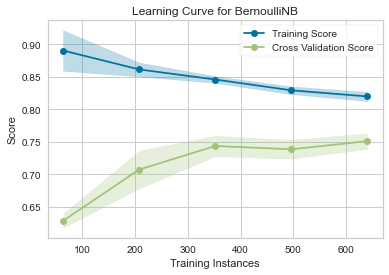

<AxesSubplot:title={'center':'Learning Curve for BernoulliNB'}, xlabel='Training Instances', ylabel='Score'>

In [247]:
from yellowbrick.model_selection import LearningCurve

#Buat contoh model pengelompokan dan visualizer
visualizer = LearningCurve(bnb, scoring="accuracy")

visualizer.fit(X_train, y_train) #Masukkan data ke visualisator
visualizer.show() #Tampilkan gambar

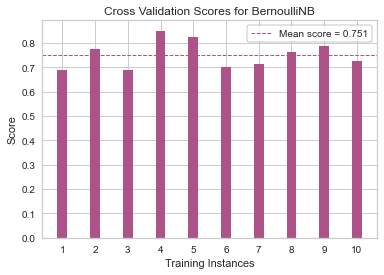

<AxesSubplot:title={'center':'Cross Validation Scores for BernoulliNB'}, xlabel='Training Instances', ylabel='Score'>

In [248]:
#Visualisasi untuk nilai setiap literasi dalam proses Validasi Silang di algoritma BNB
#!pip install yellowbrick
from yellowbrick.model_selection import CVScores
import warnings

warnings.filterwarnings('ignore')

cv = KFold(n_splits=10, shuffle=True, random_state=1)
visualizer = CVScores(bnb, cv=cv, scoring='accuracy',color="#ad5389")

visualizer.fit(X_train,y_train)
visualizer.show()

In [249]:
"""
Perhitungan nilai evaluasi dihasilkan setelah proses validasi, yang dimana dari proses pelatihan, divalidasi dengan data 
testing yang sudah disiapkan kemudian menghasilkan nilai evaluasi seperti classification report atau metrik performa akurasi, 
presisi, recall, f1-score
"""

#Waktu komputasi untuk testing data
t = time()
test_time = time() - t

print("test time:  %0.3fs" % test_time)
print("========================")

#Menentukan hasil prediksi dari X_test
#get predictions from model
y_pred_bnb = bnb.predict(X_test)

"""
Setelah proses klasifikasi selesai, diperlukan adanya evaluasi untuk menentukan kualitas metode yang telah berhasil dibuat pada 
tahap sebelumnya. Pada tahap evaluasi ini metrik performa accuracy, precision, recall, dan F1-Score akan digunakan untuk menguji 
kinerja proses klasifikasi yang ditampilkan melalui function classification_report dimana berisi parameter masukan yaitu y_test
(kumpulan label dari semua data di X_test;data pengujian) dan y_pred_bnb (proses prediksi kumpulan data pengujian (X_test) yang
bersifat variabel independen)
"""
# Classify and report the results
print(classification_report(y_test, y_pred_bnb))
print('\n')

#print('BEST BERNOULLI NAIVE BAYES MODEL')
print('Accuracy Score - Bernoulli NB:', metrics.accuracy_score(y_test, y_pred_bnb)) 

test time:  0.000s
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       127
           1       0.69      0.60      0.64        73

    accuracy                           0.76       200
   macro avg       0.74      0.72      0.73       200
weighted avg       0.75      0.76      0.75       200



Accuracy Score - Bernoulli NB: 0.755


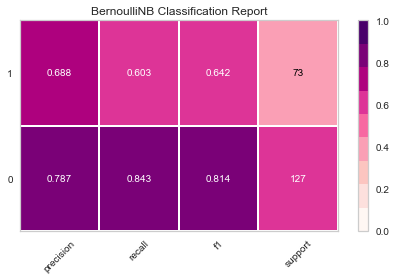

<AxesSubplot:title={'center':'BernoulliNB Classification Report'}>

In [250]:
#Library untuk menampilkan laporan evaluasi model klasifikasi dalam bentuk visualisasi agar lebih mudah dipahami
from yellowbrick.classifier import ClassificationReport

#Buat contoh model pengelompokan dan visualizer
visualizer = ClassificationReport(bnb,support=True,cmap='RdPu')

visualizer.fit(X_train, y_train)  #Sesuaikan visualisator dan modelnya
visualizer.score(X_test, y_test)  #Evaluasi model pada data pengujian
visualizer.show()

,negatif,positif,accuracy,macro avg,weighted avg
precision,0.786765,0.687500,0.755,0.737132,0.750533
recall,0.842520,0.602740,0.755,0.722630,0.755000
f1-score,0.813688,0.642336,0.755,0.728012,0.751145
support,127.000000,73.000000,0.755,200.000000,200.000000


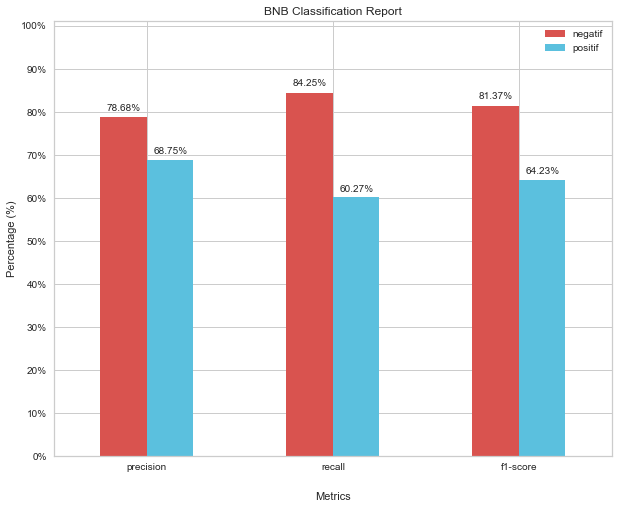

In [251]:
#Import library untuk visualisasi gambar
import matplotlib.pyplot as plt

"""
Variabel ini digunakan untuk menampung nama label yang digunakan dalam kolom untuk confusion matrix dan berfungsi sebagai tanda
label di bagian visualisasi dari classification report
"""
target_labels = ['negatif', 'positif']

#store the classification report as a dictionary
cr_dict = classification_report(y_test, y_pred_bnb, target_names=target_labels, output_dict=True)

#convert the classification report dictionary into a data frame
cr_data = pd.DataFrame(cr_dict)
display(cr_data)

#plot the classification report scores
ax=cr_data.iloc[:-1, :2].plot.bar(figsize=(10,8),color=['#d9534f','#5bc0de'])
plt.title("BNB Classification Report")
plt.xlabel('Metrics', labelpad=20)

#fix the x-ticktek mark rotation
plt.xticks(rotation=0)

#create custom y-tick marks and labels for percentage representation
#create an array of even tick marks from 0 to 1
percent_ticks = np.linspace(0,1,11, endpoint=True)

#create a list of strings representing the percentage at each tick
percent_labels = [f'{int(t*100)}%' for t in percent_ticks]
plt.yticks(ticks=percent_ticks,labels=percent_labels)
plt.ylabel('Percentage (%)')
plt.margins(0.2,0.2)

for p in ax.patches:
    ax.annotate(
        "{}%".format(str(np.round(p.get_height()*100, 2))),
        xy=(p.get_x()*1+p.get_width()/2, p.get_height()*1.02),
        ha='center',
    )

In [252]:
from sklearn.metrics import confusion_matrix
cm_bnb = confusion_matrix(y_test, y_pred_bnb)
print(cm_bnb)

[[107  20]
 [ 29  44]]


In [253]:

"""

"""
#Fungsi untuk menghitung metrik performa sensitivity dan specificity dalam proses klasifikasi
def calculate_sensitivity_specificity(y_test, y_pred_test):
    # Note: More parameters are defined than necessary. 
    # This would allow return of other measures other than sensitivity and specificity
    
    # Get true/false for whether a breach actually occurred
    actual_pos = y_test == 1
    actual_neg = y_test == 0
    
    # Get true and false test (true test match actual, false tests differ from actual)
    true_pos = (y_pred_bnb == 1) & (actual_pos)
    false_pos = (y_pred_bnb == 1) & (actual_neg)
    true_neg = (y_pred_bnb == 0) & (actual_neg)
    false_neg = (y_pred_bnb == 0) & (actual_pos)
    
    # Calculate accuracy
    accuracy_bnb = np.mean(y_pred_test == y_test)
    
    # Calculate sensitivity and specificity
    sensitivity_bnb = np.sum(true_pos) / np.sum(actual_pos)
    specificity_bnb = np.sum(true_neg) / np.sum(actual_neg)
    
    return sensitivity_bnb, specificity_bnb, accuracy_bnb

In [254]:
#Proses perhitungan dengan memanggil fungsi sebelumnya
sensitivity_bnb, specificity_bnb, accuracy_bnb = calculate_sensitivity_specificity(y_test, y_pred_bnb)
print ('Sensitivity:', sensitivity_bnb)
print ('Specificity:', specificity_bnb)
print ('Accuracy:', accuracy_bnb)

Sensitivity: 0.6027397260273972
Specificity: 0.84251968503937
Accuracy: 0.755


<AxesSubplot:>

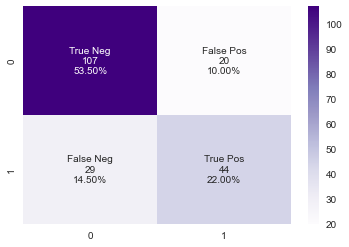

In [255]:
#Visualisasi Confusion Matrix dari model klasifikasi BNB
import seaborn as sns

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_bnb.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm_bnb.flatten()/np.sum(cm_bnb)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_bnb, annot=labels, fmt='', cmap='Purples')

In [256]:
#auc dan roc turunan dari precision
auc_roc_bnb=metrics.roc_auc_score(y_test,y_pred_bnb)
auc_roc_bnb

0.7226297055333837

In [257]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_bnb)
roc_auc_bnb = auc(false_positive_rate, true_positive_rate)
roc_auc_bnb

0.7226297055333837

Text(0.5, 0, 'False Positive Rate')

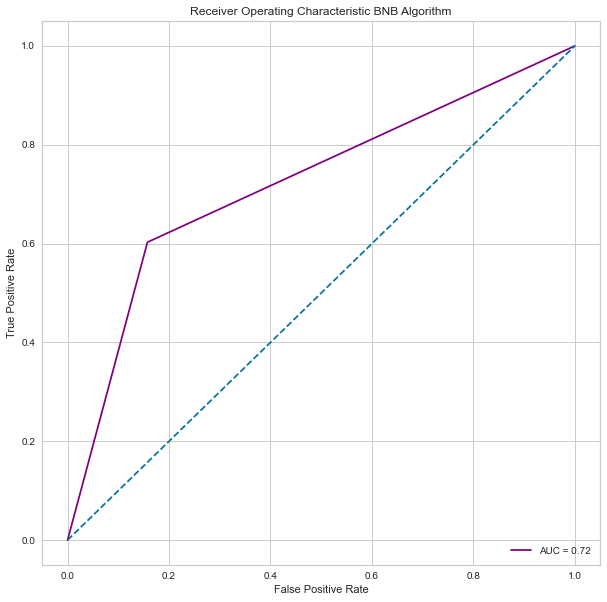

In [258]:
#Visualisasi Kurva ROC dan AUC
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic BNB Algorithm')
plt.plot(false_positive_rate,true_positive_rate, color='purple',label = 'AUC = %0.2f' % roc_auc_bnb)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# KNN

In [259]:
text_clf_knn = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', KNeighborsClassifier())])

tuned_parameters_knn = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
#   'tfidf__use_idf': (True, False),
#   'tfidf__norm': ('l1', 'l2'),
#   'tfidf__smooth_idf': (True, False),
#   'tfidf__sublinear_tf': (True, False),
    'clf__n_neighbors' : [3,4,5,7,8,9,10],
#     n = 9
#   'clf__leaf_size' : np.arange(1,41,8),
#     'clf__p' : [2,3,4,6],
    'clf__weights' :  ['uniform', 'distance'],
    'clf__metric' : ['minkowski', 'chebyshev','euclidean','manhattan'],
#     'clf__n_jobs' : [1, -1]
}

In [260]:
t = time()
#Training the model
cv = KFold(n_splits=10, shuffle=True, random_state=1)
clf_knn = GridSearchCV(text_clf_knn, tuned_parameters_knn, scoring = 'accuracy',cv=cv, n_jobs = -1, return_train_score=True)

#Fit the model
clf_knn.fit(X_train,y_train)


training_time = time() - t

print("train time: %0.3fs" % training_time)

train time: 22.710s


# pengujian setiap algoritma


In [261]:
print("Best parameters set found on development set:")
print(clf_knn.best_params_)
print("Best Score:", clf_knn.best_score_)
print('\n')

means = clf_knn.cv_results_['mean_test_score']
stds = clf_knn.cv_results_['std_test_score']
params = clf_knn.cv_results_['params']
for mean, stdev, param in zip(means,stds,params):
    print("Mean: %f Stdev:(%f) with: %r" % (mean,stdev,param))

Best parameters set found on development set:
{'clf__metric': 'minkowski', 'clf__n_neighbors': 10, 'clf__weights': 'distance', 'tfidf__ngram_range': (1, 1)}
Best Score: 0.8049999999999999


Mean: 0.757500 Stdev:(0.057064) with: {'clf__metric': 'minkowski', 'clf__n_neighbors': 3, 'clf__weights': 'uniform', 'tfidf__ngram_range': (1, 1)}
Mean: 0.755000 Stdev:(0.055114) with: {'clf__metric': 'minkowski', 'clf__n_neighbors': 3, 'clf__weights': 'uniform', 'tfidf__ngram_range': (1, 2)}
Mean: 0.747500 Stdev:(0.056954) with: {'clf__metric': 'minkowski', 'clf__n_neighbors': 3, 'clf__weights': 'uniform', 'tfidf__ngram_range': (1, 3)}
Mean: 0.761250 Stdev:(0.055748) with: {'clf__metric': 'minkowski', 'clf__n_neighbors': 3, 'clf__weights': 'distance', 'tfidf__ngram_range': (1, 1)}
Mean: 0.761250 Stdev:(0.055467) with: {'clf__metric': 'minkowski', 'clf__n_neighbors': 3, 'clf__weights': 'distance', 'tfidf__ngram_range': (1, 2)}
Mean: 0.755000 Stdev:(0.058949) with: {'clf__metric': 'minkowski', 'clf__

In [262]:
result_knn = pd.DataFrame(clf_knn.cv_results_['params'])
result_knn['test_score'] = clf_knn.cv_results_['mean_test_score']
result_knn['train_score'] = clf_knn.cv_results_['mean_train_score']
result_knn

,clf__metric,clf__n_neighbors,clf__weights,tfidf__ngram_range,test_score,train_score
0,minkowski,3,uniform,"(1, 1)",0.75750,0.814028
1,minkowski,3,uniform,"(1, 2)",0.75500,0.811250
2,minkowski,3,uniform,"(1, 3)",0.74750,0.806667
3,minkowski,3,distance,"(1, 1)",0.76125,0.827639
4,minkowski,3,distance,"(1, 2)",0.76125,0.827778
...,...,...,...,...,...,...
163,manhattan,10,uniform,"(1, 2)",0.71125,0.767500
164,manhattan,10,uniform,"(1, 3)",0.68875,0.755278
165,manhattan,10,distance,"(1, 1)",0.80125,0.846944
166,manhattan,10,distance,"(1, 2)",0.79375,0.848056


# model-knn


In [263]:
from sklearn.model_selection import GridSearchCV

t = time()
#training the model
knn = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1,3))),
#                 ,norm='l1'
# ,smooth_idf=True,sublinear_tf=True, use_idf=True
#                  ('sampling',ADASYN()),
                ('clf', KNeighborsClassifier(n_neighbors=8, metric='minkowski', weights='distance'))])
# metric='minkowski', n_jobs=1, p=2, weights='distance',

knn.fit(X_train,y_train)

training_time = time() - t

print("train time: %0.3fs" % training_time)

print("================================")
print("Hasil Score data train : ", knn.score(X_train,y_train))
print("Hasil Score data test : ", knn.score(X_test,y_test))

train time: 0.016s
Hasil Score data train :  0.84125
Hasil Score data test :  0.805


In [264]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)
accuracy = cross_val_score(knn, X_train, y_train, scoring = 'accuracy', cv = cv)
print('cross validation score', accuracy)

#compute average cross-validation score
print('Average cross-validation Mean Score : {:.4f}'.format(accuracy.mean()))

#compute average cross-validation score
print('Average cross-validation Std Score : {:.4f}'.format(accuracy.std()))

cross validation score [0.675  0.8375 0.7125 0.9    0.8    0.7125 0.7875 0.775  0.85   0.8125]
Average cross-validation Mean Score : 0.7863
Average cross-validation Std Score : 0.0662


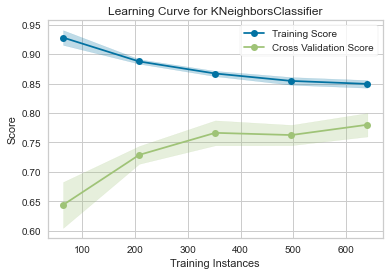

<AxesSubplot:title={'center':'Learning Curve for KNeighborsClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [265]:
from yellowbrick.model_selection import LearningCurve

# Instantiate the clustering model and visualizer
visualizer = LearningCurve(knn, scoring="accuracy")

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

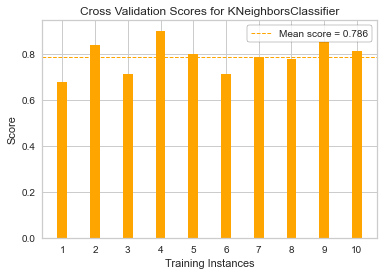

<AxesSubplot:title={'center':'Cross Validation Scores for KNeighborsClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [266]:
#!pip install yellowbrick

from yellowbrick.model_selection import CVScores
import warnings
warnings.filterwarnings('ignore')

cv = KFold(n_splits=10, shuffle=True, random_state=1)
visualizer = CVScores(knn, cv=cv, scoring='accuracy',color="orange")

visualizer.fit(X_train,y_train)
visualizer.show()

In [267]:
t = time()
#get predictions from model

#get predictions from model
y_pred_knn = knn.predict(X_test)
# y_pred_knn = clf_knn.predict(X_test)

test_time = time() - t
print("test time:  %0.3fs" % test_time)
print("========================")

print(classification_report(y_test, y_pred_knn))
print('\n')

#print('BEST KNN MODEL')
print('Accuracy Score - KNN:', metrics.accuracy_score(y_test, y_pred_knn)) 
#print('MAE Score:', mean_absolute_error(y_test, y_pred_knn)) 
#print('MSE Score', mean_squared_error(y_test, y_pred_knn)) 

test time:  0.018s
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       127
           1       0.87      0.55      0.67        73

    accuracy                           0.81       200
   macro avg       0.83      0.75      0.77       200
weighted avg       0.82      0.81      0.79       200



Accuracy Score - KNN: 0.805


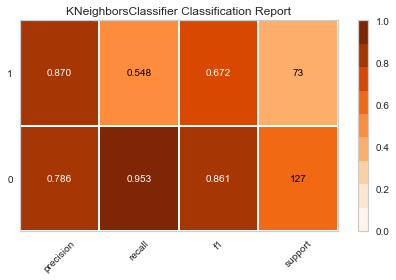

<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>

In [268]:
from yellowbrick.classifier import ClassificationReport

# Instantiate the classification model and visualizer
visualizer = ClassificationReport(knn,support=True,cmap='Oranges')

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

,negatif,positif,accuracy,macro avg,weighted avg
precision,0.785714,0.869565,0.805,0.827640,0.816320
recall,0.952756,0.547945,0.805,0.750351,0.805000
f1-score,0.861210,0.672269,0.805,0.766739,0.792246
support,127.000000,73.000000,0.805,200.000000,200.000000


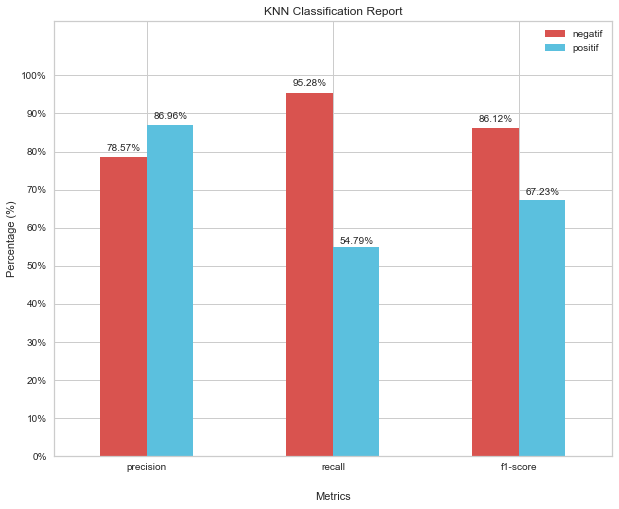

In [269]:
#create labels to be used and columns for a confusion matrix downstream
target_labels = ['negatif', 'positif']

#store the classification report as a dictionary
cr_dict = classification_report(y_test, y_pred_knn, target_names=target_labels, output_dict=True)

#convert the classification report dictionary into a data frame
cr_data = pd.DataFrame(cr_dict)
display(cr_data)

#plot the classification report scores
ax = cr_data.iloc[:-1, :2].plot.bar(figsize=(10,8),color=['#d9534f','#5bc0de'])
plt.title("KNN Classification Report")
plt.xlabel('Metrics', labelpad=20)

#fix the x-tick mark rotation
plt.xticks(rotation=0)

#create custom y-tick marks and labels for percentage representation
#create an array of even tick marks from 0 to 1
percent_ticks = np.linspace(0,1,11, endpoint=True)

#create a list of strings representing the percentage at each tick
percent_labels = [f'{int(t*100)}%' for t in percent_ticks]
plt.yticks(ticks=percent_ticks,labels=percent_labels)
plt.ylabel('Percentage (%)')
plt.margins(0.2,0.2)

for p in ax.patches:
    ax.annotate(
        "{}%".format(str(np.round(p.get_height()*100, 2))),
        xy=(p.get_x()*1+p.get_width()/2, p.get_height()*1.02),
        ha='center',
    )

In [270]:
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

[[121   6]
 [ 33  40]]


In [271]:
def calculate_sensitivity_specificity(y_test, y_pred_test):
    # Note: More parameters are defined than necessary. 
    # This would allow return of other measures other than sensitivity and specificity
    
    # Get true/false for whether a breach actually occurred
    actual_pos = y_test == 1
    actual_neg = y_test == 0
    
    # Get true and false test (true test match actual, false tests differ from actual)
    true_pos = (y_pred_knn == 1) & (actual_pos)
    false_pos = (y_pred_knn == 1) & (actual_neg)
    true_neg = (y_pred_knn == 0) & (actual_neg)
    false_neg = (y_pred_knn == 0) & (actual_pos)
    
    # Calculate accuracy
    accuracy_knn = np.mean(y_pred_test == y_test)
    
    # Calculate sensitivity and specificity
    sensitivity_knn = np.sum(true_pos) / np.sum(actual_pos)
    specificity_knn = np.sum(true_neg) / np.sum(actual_neg)
    
    return sensitivity_knn, specificity_knn, accuracy_knn

In [272]:
sensitivity_knn, specificity_knn, accuracy_knn = calculate_sensitivity_specificity(y_test, y_pred_knn)
print ('Sensitivity:', sensitivity_knn)
print ('Specificity:', specificity_knn)
print ('Accuracy:', accuracy_knn)

Sensitivity: 0.547945205479452
Specificity: 0.952755905511811
Accuracy: 0.805


<AxesSubplot:>

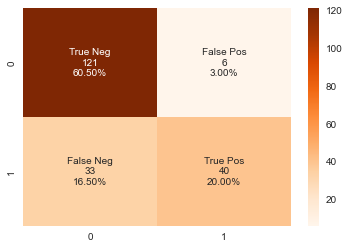

In [273]:
import seaborn as sns

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_knn.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm_knn.flatten()/np.sum(cm_knn)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_knn, annot=labels, fmt='', cmap='Oranges')

In [274]:
auc_roc_knn=metrics.roc_auc_score(y_test,y_pred_knn)
auc_roc_knn

0.7503505554956315

In [275]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_knn)
roc_auc_knn = auc(false_positive_rate, true_positive_rate)
roc_auc_knn

0.7503505554956315

Text(0.5, 0, 'False Positive Rate')

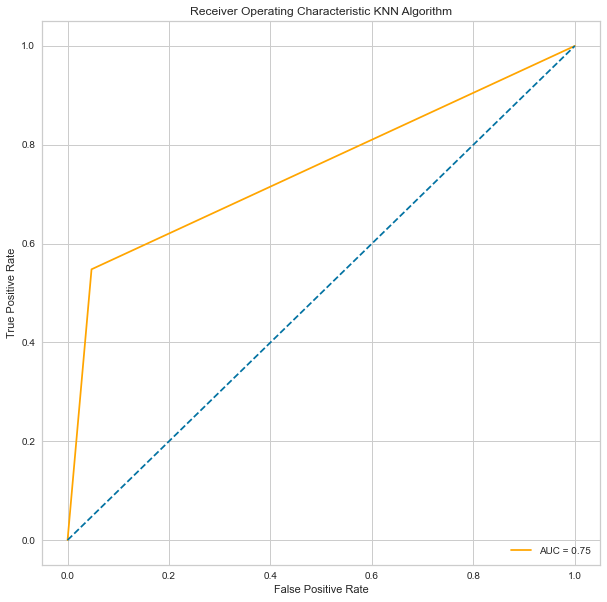

In [276]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic KNN Algorithm')
plt.plot(false_positive_rate,true_positive_rate, color='orange',label = 'AUC = %0.2f' % roc_auc_knn)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

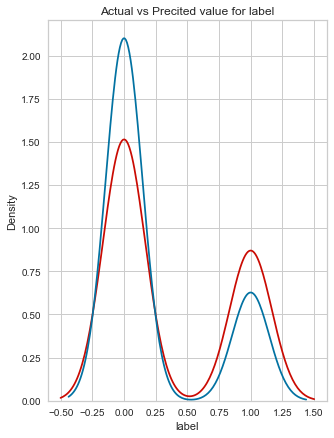

In [277]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 7))
ax = sns.distplot(data_test['label'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_knn, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Precited value for label')
plt.show()
plt.close()

# Perbandingan Setiap Algoritma


,BNB,KNN
Accuracy,0.755,0.805


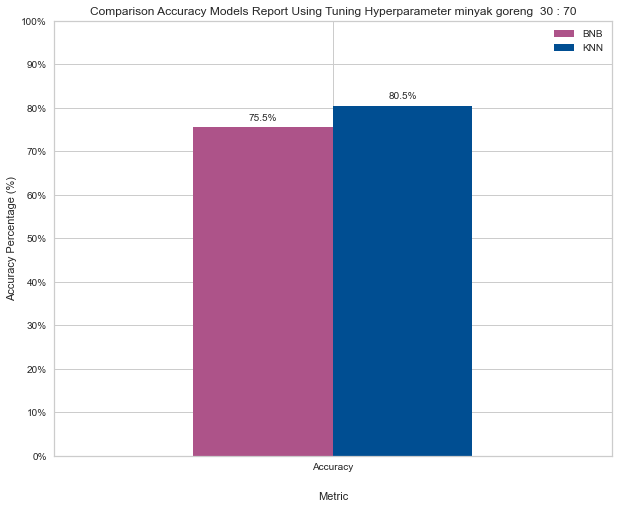

In [278]:
#store the classification report as a dictionary
clf_bnb = metrics.accuracy_score(y_test, y_pred_bnb)
clf_knn = metrics.accuracy_score(y_test, y_pred_knn)
cr_dict = [clf_bnb, clf_knn]

#convert the classification report dictionary into a data frame
cr_data = pd.DataFrame({
    "BNB":[clf_bnb],
    "KNN":[clf_knn],
},
index = ["Accuracy"])
display(cr_data)

ax = cr_data.plot.bar(figsize=(10,8),color=['#ad5389','#004e92', '#ff9068'])
#plt.bar(cr_data, figsize=(10,8),color=['#5bc0de', '#d8634f'])
plt.title("Comparison Accuracy Models Report Using Tuning Hyperparameter minyak goreng  30 : 70")
plt.xlabel('Metric', labelpad=20)

#fix the x-tick mark rotation
plt.xticks(rotation=0)

#create custom y-tick marks and labels for percentage representation
#create an array of even tick marks from 0 to 1
percent_ticks = np.linspace(0,1,11, endpoint=True)

#create a list of strings representing the percentage at each tick
percent_labels = [f'{int(t*100)}%' for t in percent_ticks]
plt.yticks(ticks=percent_ticks,labels=percent_labels)
plt.ylabel('Accuracy Percentage (%)')

for p in ax.patches:
    ax.annotate(
        "{}%".format(str(np.round(p.get_height()*100, 2))),
        xy=(p.get_x()*1+p.get_width()/2, p.get_height()*1.02),
        ha='center')

# COMPARE CLASSIFICATION REPORT


In [279]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#BNB
print("Bernoulli Naive Bayes")
print("--------------------------")
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)
print('Accuracy: %.3f' % accuracy_bnb)
precision_bnb = precision_score(y_test, y_pred_bnb, average='binary')
print('Precision: %.3f' % precision_bnb)
recall_bnb = recall_score(y_test, y_pred_bnb, average='binary')
print('Recall: %.3f' % recall_bnb)
score_bnb = f1_score(y_test, y_pred_bnb, average='binary')
print('F-Measure: %.3f' % score_bnb)
print("==========================")
#====================
#KNN
print("KNN")
print("--------------------------")
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print('Accuracy: %.3f' % accuracy_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='binary')
print('Precision: %.3f' % precision_knn)
recall_knn = recall_score(y_test, y_pred_knn, average='binary')
print('Recall: %.3f' % recall_knn)
score_knn = f1_score(y_test, y_pred_knn, average='binary')
print('F-Measure: %.3f' % score_knn)
print("==========================")
#=====================

Bernoulli Naive Bayes
--------------------------
Accuracy: 0.755
Precision: 0.688
Recall: 0.603
F-Measure: 0.642
KNN
--------------------------
Accuracy: 0.805
Precision: 0.870
Recall: 0.548
F-Measure: 0.672


In [280]:
acc_tuning_2080_minyakgoreng = [accuracy_bnb,accuracy_knn]

In [281]:
import joblib
final_model = acc_tuning_2080_minyakgoreng
joblib.dump(final_model, "terbaru-kfold-acc_tuning_3070_minyakgoreng.pkl")

['terbaru-kfold-acc_tuning_3070_minyakgoreng.pkl']

In [282]:
#convert the classification report dictionary into a data frame
cr_data = pd.DataFrame({
    "BNB":[accuracy_bnb,precision_bnb,recall_bnb,score_bnb],
    "KNN":[accuracy_knn,precision_knn,recall_bnb,score_knn],
},
index = ["accuracy","precision","recall","f1-score"])
display(cr_data)

,BNB,KNN
accuracy,0.755000,0.805000
precision,0.687500,0.869565
recall,0.602740,0.602740
f1-score,0.642336,0.672269


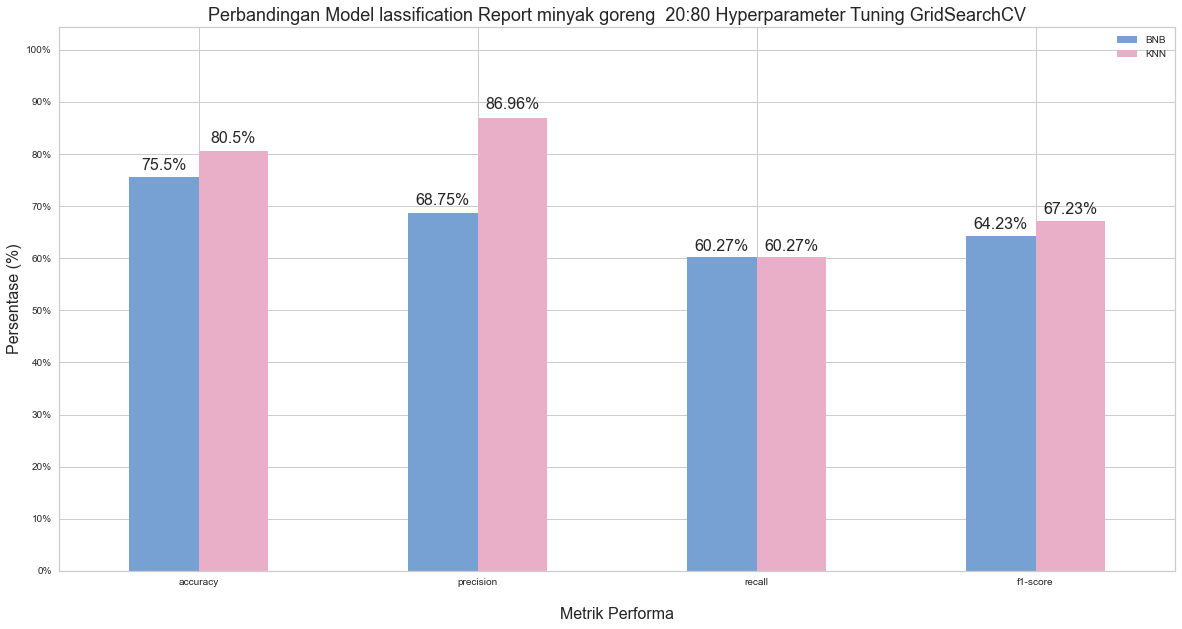

In [283]:
#plot the classification report scores
ax = cr_data.iloc[:, :4].plot.bar(figsize=(20,10),color=['#77A1D3','#eaafc8', '#BE93C5'])
plt.title("Perbandingan Model lassification Report minyak goreng  20:80 Hyperparameter Tuning GridSearchCV", fontsize=18,ha='center')
plt.xlabel('Metrik Performa', labelpad=20, fontsize=16,ha='center')

#fix the x-tick mark rotation
plt.xticks(rotation=0)

#create custom y-tick marks and labels for percentage representation
#create an array of even tick marks from 0 to 1
percent_ticks = np.linspace(0,1,11, endpoint=True)

#create a list of strings representing the percentage at each tick
percent_labels = [f'{int(t*100)}%' for t in percent_ticks]
plt.yticks(ticks=percent_ticks,labels=percent_labels)
plt.ylabel('Persentase (%)', fontsize=16,ha='center')
plt.margins(0.2,0.2)

for p in ax.patches:
    ax.annotate(
        "{}%".format(str(np.round(p.get_height()*100, 2))),
        xy=(p.get_x()*1+p.get_width()/2, p.get_height()*1.02),
         fontsize=16, ha='center',
    )